<a href="https://colab.research.google.com/github/LucasRobles2323/Tareas-MetodosNumericos/blob/main/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integrantes:

* Felipe Bravo

* Vicente Becerra

* Gerald Espinoza

* Lucas Robles

#**PREGUNTA 1**

---

##Regresión Lineal Simple y Múltiple:

> Una universidad en EEUU quiere hacer un estudio de como se relacionan las notas de las $3$ pruebas del semestre con la nota final del examen. Para ello cuentan con $25$ datos del semestre pasado. Encontrar el modelo de regresión lineal múltiple para realizar esta tarea. (Ejemplo real y se llama “Test Scores for General Psychology”.  Descargue el archivo mlr03.xls). 

  * Primero realice una regresión lineal simple, en donde utilice la nota de la primera prueba como variable independiente y la nota del examen como la dependiente. Muestre en un gráfico los datos y la recta que se genera.

  * Luego implemente la regresión lineal múltiple con todos los datos.

> Verifique la calidad de los modelos calculando la medida de desempeño $r^2$. Debe calcular la métrica de desempeño para cada uno de los problemas.

---

###**Regresión Lineal Simple**

###**Regresión Lineal Multiple**

#**PREGUNTA 2**

---

##Interpolación polinomial de Newton y Lagrange:
> Dados los puntos de la forma $(x;f(x))$ siguientes: $[(1;0) (2;5) (2.5;6.5) (3;7) (4;3) (5;1)]$. Calcule $f(3-4)$ usando interpolación de ordenes $1$ a $3$. Encuentre la secuencia de puntos para sus estimados para obtener el mejor resultado. Esto es, los puntos deberian estar centrados y lo mas cerca del valor desconocido.

---

###**Newton**

###**Lagrange**

#**PREGUNTA 3**

---

##Utilice la regla trapezoidal de $4$ segmentos $(n = 4)$ para estimar la integral de $f(x) = 0.2 + 25x − 200x^2 + 675x^3 − 900x^4 + 400x^5$ desde $a = 0$ a $b = 0.8$.

---

###Fórmula

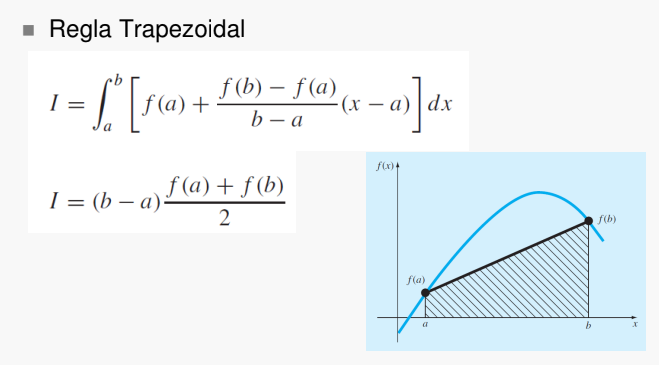

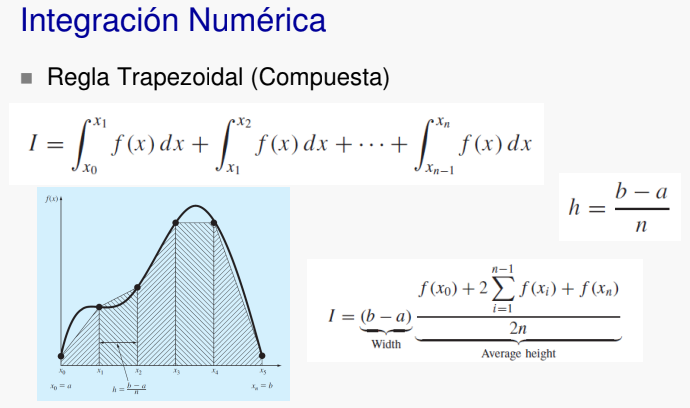

En nuestro caso:

* $n=4, a=0 , b=0.8$

* $h = \frac{0.8-0}{4} = 0.2$

* $I = \displaystyle ∫_{0.0}^{0.2}f(x)dx + ∫_{0.2}^{0.4}f(x)dx + ∫_{0.4}^{0.6}f(x)dx + ∫_{0.6}^{0.8}f(x)dx$

* $ I = (0.8-0) \frac{f(x_0) + 2\displaystyle\sum_{i=1}^{4-1} f(x_i) + f(x_4)}{2*4} =  (0.8) \frac{f(x_0) + 2\displaystyle\sum_{i=1}^{3} f(x_i) + f(x_3)}{8}$



###Código


In [ ]:
"""
    DESCARTADOS
"""

# Obtiene la diferencia en el eje X de los segmentos que se usan en la regla trapezoidal
def difIntervalo(a,b,n):
    h = float(float(b) - float(a))
    h /= float(n)
    return h

# No usado por falta de precisión, debe obtener cada intervalo de segmento de integración
def obtenerXs(a,b,n):
    h = difIntervalo(a,b,n)
    X = []
    i = a
    while i <= b:
        X.append(i) # Cuando i=0.4 y h=0.2
        i = i + h # Da como resultado 0.6000000000000001 en vez de 0.6, y no se por que
    return X

X = obtenerXs(0.0, 0.8, 4.0)
print(X) ## No se porque lo muestra asi, por eso no use este metodo

[0.0, 0.2, 0.4, 0.6000000000000001, 0.8]


In [ ]:
# Evalua el x recibido en la función
def f(x):
    y = 0.2
    y += (25 * x)
    y += ((-200) * pow(x,2))
    y += (675 * pow(x,3))
    y += ((-900) * pow(x,4))
    y += (400 * pow(x,5))
    return y

In [ ]:
# Recibe una lista de x a evaluar.
# Evalua cada x en la función guardandolo en una lista.
# La posicion de cada x evaluado es la misma que tienen los x en la lista recibida.
# Retorna la lista con los x evaluados en la función.
def funcionDeXs(X):
    fX = []
    for i in X:
        fX.append(f(i))
    return fX

In [ ]:
# La sumatoria de cada elemento en el arreglo
def sumatoria(fX):
    n = len(fX)
    sum = 0
    for i in range(int(n)):
        sum += fX[i]
    return sum

In [ ]:
def calcularAproximacionIntegral(a, b, n):
    # Calcular las x a evaluar
    # X = obtenerXs(a, b, n)
    X = [0.0, 0.2, 0.4, 0.6, 0.8]

    # Obtener el valor evaluando cada x
    fX = funcionDeXs(X)

    # Lo que multiplica a la fracción 
    producto = (b-a) 
    
    # Parte sin sumatoria del numerador
    numerador = fX[0]
    numerador += fX[int(n)-1]
    # Parte con sumatoria del numerador
    suma = sumatoria( fX[1:int(n)-1] ) # Envia los "x=1 to n-2" evaluados. 
    suma *= 2
    # Uniendo las partes del numerador
    numerador += suma

    # El denominador de la fracción
    denominador = 2 * n

    # Uniendo la integral
    integral = float(producto)
    integral *= float(numerador)
    integral /= float(denominador)
    return integral

###Respuesta.

In [ ]:
a = 0.0; b = 0.8; n = 4.0

I = calcularAproximacionIntegral(a, b, n)

print(f"La Integral de la función aproximada con la regla de Trapezoidal (usando [{a} , {b}] de limites de integración y 4 segmentos) es: \n\n" +
      f"    Integral = {I}")

La Integral de la función aproximada con la regla de Trapezoidal (usando [0.0 , 0.8] de limites de integración y 4 segmentos) es: 

    Integral = 1.1151999999999977
